In [122]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [123]:
dataset_url = 'http://iali.in/datasets/Social_Network_Ads.csv'
data = pd.read_csv(dataset_url)
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [124]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [125]:
#separating data and labels -- label is purchased column
y = data.Purchased
x = data.drop(['User ID','Gender','Purchased'], axis=1)   # userid and gender would not affect if person will buy or not

In [126]:
#separating train test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)
print("\nX_train:\n")
print(x_train.head())
print(x_train.shape)

print("\nX_test:\n")
print(x_test.head())
print(x_test.shape)



X_train:

     Age  EstimatedSalary
184   33            60000
300   58            38000
164   33            69000
218   46            96000
260   35            77000
(320, 2)

X_test:

     Age  EstimatedSalary
98    35            73000
157   29            75000
187   33            41000
253   37           146000
33    28            44000
(80, 2)


In [128]:
#scaling from -1 to 1
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(x_train) 
xtest = sc_x.transform(x_test) 

xtrain[0:10]


array([[-0.42142285, -0.29060962],
       [ 1.97132577, -0.95832886],
       [-0.42142285, -0.01745175],
       [ 0.82280643,  0.80202186],
       [-0.23000296,  0.22535524],
       [ 0.34425671,  0.07360087],
       [ 0.24854676, -0.68517099],
       [ 1.3970661 , -0.95832886],
       [ 2.16274566,  1.16623235],
       [ 0.05712687,  0.31640787]])

In [129]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, y_train) 

C:\Users\keval\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [130]:
y_pred = classifier.predict(xtest) 

In [131]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

Accuracy :  0.8375


In [132]:
df=pd.DataFrame({'actual':y_test,'Predicted':y_pred})
df

,actual,Predicted
98,0,0
157,0,0
187,0,0
253,1,1
33,0,0
...,...,...
29,0,0
94,0,0
246,0,0
359,0,0


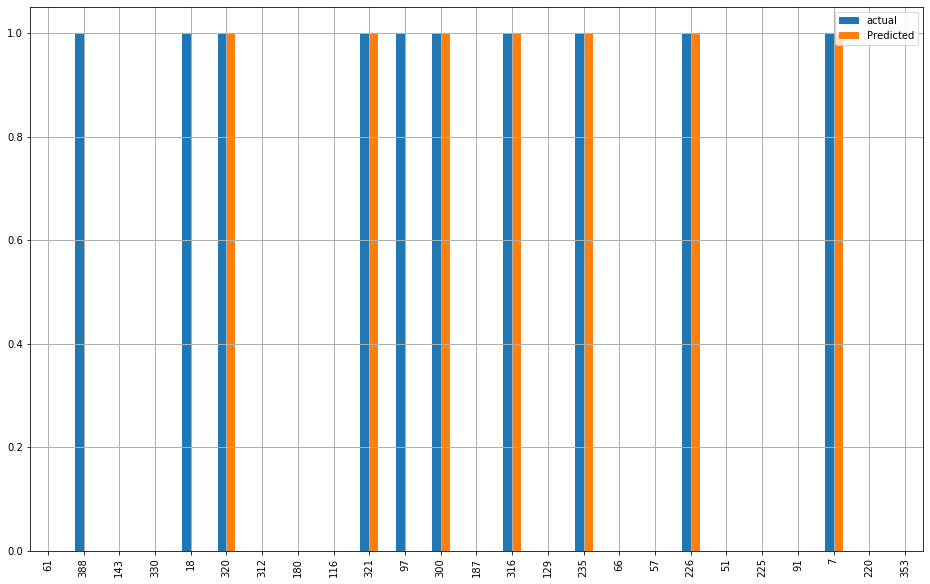

In [108]:
df1=df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major' ,linestyle='-' ,linewidth='1')
plt.grid(which='minor' ,linestyle=':' ,linewidth='1')
plt.show()

In [82]:
#By Decision tree model

In [109]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf=clf .fit(x_train,y_train)

In [110]:
y_pred1=clf.predict(x_test)

In [111]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

Accuracy :  0.85


In [112]:
from sklearn.metrics import classification_report
classes=['0','1']
classification_report(y_test,y_pred,target_names=classes)

'              precision    recall  f1-score   support\n\n           0       0.85      0.92      0.88        48\n           1       0.86      0.75      0.80        32\n\n    accuracy                           0.85        80\n   macro avg       0.85      0.83      0.84        80\nweighted avg       0.85      0.85      0.85        80\n'

In [114]:
df=pd.DataFrame({'actual':y_test,'Predicted':y_pred1})
df

,actual,Predicted
61,0,0
388,1,1
143,0,0
330,0,0
18,1,1
...,...,...
246,0,0
151,0,0
2,0,0
329,1,1


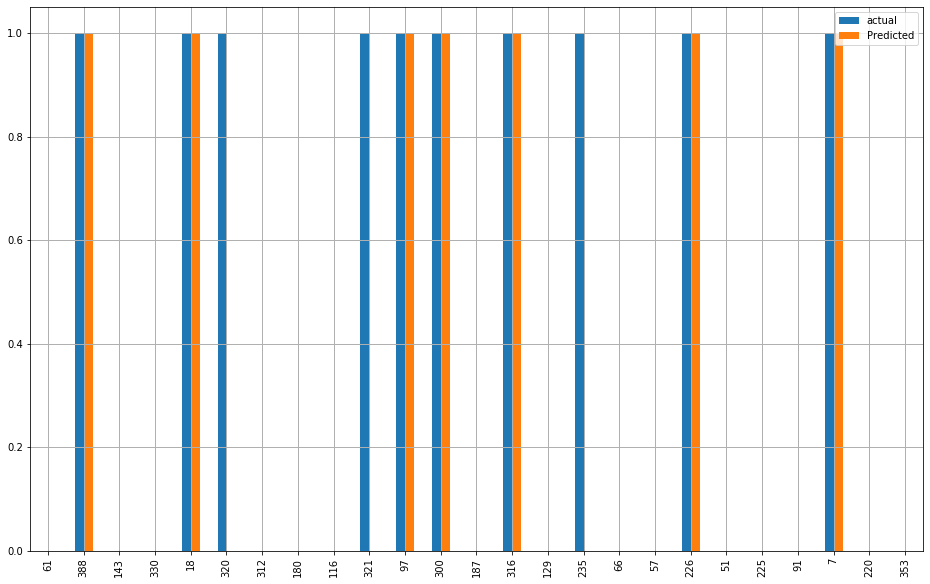

In [92]:
df1=df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major' ,linestyle='-' ,linewidth='1')
plt.grid(which='minor' ,linestyle=':' ,linewidth='1')
plt.show()